In [1]:
!date

Sat Nov 14 19:17:18 PST 2020


# Num Reads per cluster 

In [1]:
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import scanpy as sc
from scipy.stats import ks_2samp, ttest_ind
import ast
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings('ignore')

def nd(arr):
    return np.asarray(arr).reshape(-1)

def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set(**{
        "aspect": "equal",
        "xlim": lims,
        "ylim": lims
    })
    return ax

import sys
sys.path.append('/home/sina/projects/mop/BYVSTZP_2020/trackfig')
from trackfig.utils import get_notebook_name
from trackfig.trackfig import trackfig 

TRACKFIG = "/home/sina/projects/mop/BYVSTZP_2020/trackfig.txt"
NB = get_notebook_name()

fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [2]:
isoform = anndata.read_h5ad("../../data/notebook/revision/no_filter_gene.h5ad")

In [3]:
nr = pd.read_csv("../../data/SMARTseq/fastqs/read_data.txt", header=None, sep="\t", index_col=0, names=["file", "nr"])

In [4]:
nr.index = nr.index.map(lambda x: x.split("_R1.")[0])

In [5]:
isoform.obs["nr"] = isoform.obs.cell_id.map(nr["nr"])

In [6]:
nr_sum = isoform.obs.groupby("cluster_label")["nr"].sum()
c_size = isoform.obs.groupby("cluster_label").count()

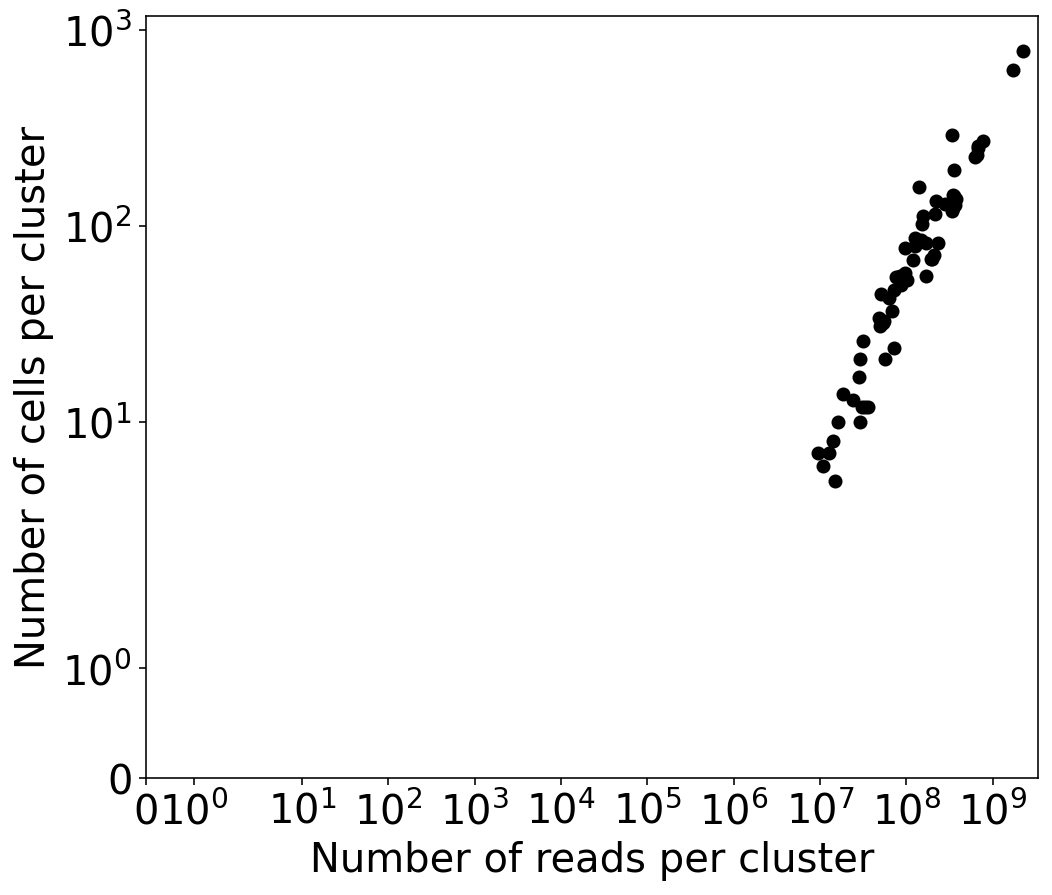

In [7]:
fig, ax = plt.subplots(figsize=(8,7))

x = nr_sum.values
y = c_size.cluster_id.values

ax.scatter(x,y, color="k")

ax.set(**{
    "xscale": "symlog",
    "yscale": "symlog",
    "xlim": (0, max(x)*1.5),
    "ylim": (0, max(y)*1.5),
    "xlabel": "Number of reads per cluster",
    "ylabel": "Number of cells per cluster"
})


fig.show()

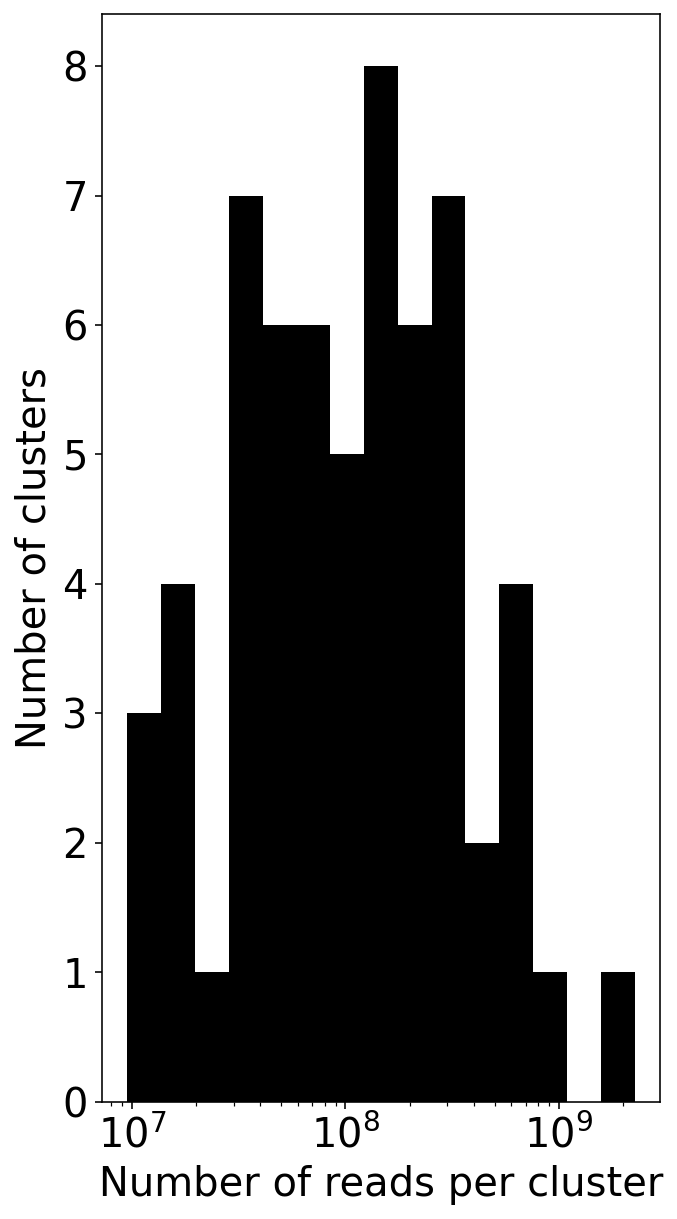

In [9]:
fig, ax = plt.subplots(figsize=(5,10))

x = nr_sum.values

MIN, MAX = np.min(x), np.max(x)

ax.hist(x, bins=10 ** np.linspace(np.log10(MIN), np.log10(MAX), 16), color="k")

ax.set(**{
    "xlabel": "Number of reads per cluster",
    "ylabel": "Number of clusters",
    "xscale": "log"
})

plt.savefig(trackfig("../../figures/smartseq_reads_per_cluster_hist.png", TRACKFIG, NB), bbox_inches='tight', dpi=300)


fig.show()

In [9]:
(x>20000000).sum()/x.shape[0]

0.8870967741935484

In [10]:
np.sort(x)

array([   9499100,   10872281,   12581955,   14278403,   14880175,
         16114556,   18534573,   24399125,   28592386,   28706310,
         29217502,   30926182,   31764765,   33635024,   35898306,
         47926429,   49732595,   50280722,   53024216,   55766776,
         56726743,   62562299,   67508921,   72145573,   72300492,
         76690783,   84064578,   86895010,   96448771,   96972851,
        101766018,  117984150,  125967746,  126437949,  140945444,
        147625135,  152093355,  155875577,  169143919,  170441140,
        191469890,  200085091,  206724746,  215370475,  221104827,
        232338229,  284100597,  339962059,  341698381,  345874567,
        349515785,  352300380,  360945908,  369318849,  372990697,
        627696389,  654268759,  669497652,  683081230,  768845966,
       1741974836, 2264376507])

In [11]:
np.median(x)

109875084.0

In [12]:
np.mean(x)

235012413.79032257

# Number of reads

In [13]:
# class
isoform.obs.groupby("class_label")["nr"].sum().sort_values().apply(lambda x: f"{x:,.0f}")

class_label
Low Quality          33,635,024
Non-Neuronal         65,192,247
GABAergic         3,115,526,811
Glutamatergic    11,356,415,573
Name: nr, dtype: object

In [14]:
# subclass
isoform.obs.groupby("subclass_label")["nr"].sum().sort_values().apply(lambda x: f"{x:,.0f}")

subclass_label
Endo               9,499,100
VLMC              10,872,281
L6 IT Car3        14,880,175
Astro             16,114,556
SMC               28,706,310
L5 PT             30,926,182
Low Quality       33,635,024
Sncg             109,030,726
L5/6 NP          579,715,443
Pvalb            603,513,779
Lamp5            675,073,266
Sst              689,608,209
Vip            1,038,300,831
L6 IT          1,129,459,775
L6b            1,277,235,384
L2/3 IT        1,369,462,175
L6 CT          2,622,551,416
L5 IT          4,332,185,023
Name: nr, dtype: object

In [15]:
isoform.obs.groupby("cluster_label")["nr"].sum().sort_values().apply(lambda x: f"{x:,.0f}")

cluster_label
Endo Slc38a5         9,499,100
VLMC                10,872,281
Sncg Slc17a8        12,581,955
L6b Kcnip1_2        14,278,403
L6 IT Car3          14,880,175
                     ...      
L5 IT S100b_1      669,497,652
L5 IT Rspo2        683,081,230
L6 IT Sulf_3       768,845,966
L5 IT Rspo1      1,741,974,836
L6 CT Grp_1      2,264,376,507
Name: nr, Length: 62, dtype: object